In [2]:
import base64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import  BytesIO
from PIL import Image, ImageOps
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../Langdat/fashion-mnist.csv")
df_labels = df.pop('label')
X_train, X_test, y_train, y_test = train_test_split(df, df_labels, test_size=.2)
X_train.shape, X_test.shape

((8000, 784), (2000, 784))

In [4]:
clf = Perceptron(tol=1e-3)
clf.fit(X_train, y_train)
print("Perceptron accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Perceptron accuracy: 0.7745


Iteration 1, loss = 11.21479699
Iteration 2, loss = 5.34259991
Iteration 3, loss = 4.56113685
Iteration 4, loss = 3.71454922
Iteration 5, loss = 3.14602238
Iteration 6, loss = 2.61043505
Iteration 7, loss = 2.49611060
Iteration 8, loss = 2.23388884
Iteration 9, loss = 1.61169642
Iteration 10, loss = 1.63725200
Iteration 11, loss = 1.90613010
Iteration 12, loss = 1.19680684
Iteration 13, loss = 1.72460193
Iteration 14, loss = 1.44573292
Iteration 15, loss = 1.11005437
Iteration 16, loss = 1.26374411
Iteration 17, loss = 1.17169601
Iteration 18, loss = 0.87097977
Iteration 19, loss = 0.95285413
Iteration 20, loss = 0.76238681
Multilayer Perceptron accuracy: 0.8195


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


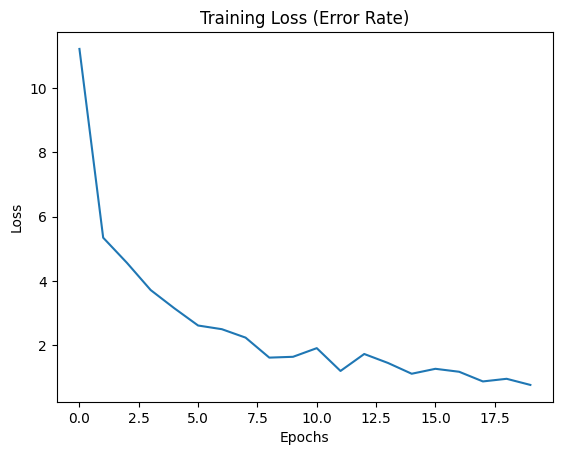

In [5]:
model = MLPClassifier(hidden_layer_sizes=(512,), max_iter = 20, verbose=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Multilayer Perceptron accuracy:", accuracy_score(y_test, y_pred))

plt.plot(model.loss_curve_)
plt.title("Training Loss (Error Rate)")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.show()

In [1]:
def predict_from_b64(b_str):
    img_data = base64.b64decode(b_str)

    img = Image.open(BytesIO(img_data)).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((28, 28))
    img_arr = np.array(img).reshape(-1) / 255.0
    return model.predict((img_arr))[0], img

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
b64_str = input("Input the base64 string of the image (bit.ly/b64encode): ")
prediction, image = predict_from_b64(b64_str)
print("Predicted class:", classes[prediction])

plt.imshow(image, cmap='gray')
plt.show()

NameError: name 'base64' is not defined